In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.insert(1, 
    '../data_Project_inphb/')

In [3]:
from preprocessing.preprocessing import convert_cast, input_missing_values, transform_df, dummify_features
from processing.model import parse_model, parse_model2, parse_model_final, compute_score, clf_importances

In [4]:
train = pd.read_csv("../data/train.csv", sep=',')

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
categorical_cols = ["Survived", "Pclass"]
df = convert_cast(train, categorical_cols)

KeyError: 'converters'

In [8]:
df.info()

NameError: name 'df' is not defined

In [9]:
a = input_missing_values(train)

In [10]:
model_cols1 = ['SibSp', 'Parch', 'Fare']

In [11]:
X, y = parse_model(X = train.copy(), use_columns = model_cols1)

split in train and test set

In [24]:
from sklearn.model_selection import cross_val_score, train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### quick modelisation: logistics Regression 



In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [28]:
# On utilise donc la moyenne de plusieurs validation croisées pour augmenter 
#la significativité de la validation

compute_score(lr, X, y)

# ce score est proche de la moyenne de la vingtaine de tests de validation réalisée plus haut.
# ce qui valide la pertinence de cette stratégie de croos validation.

Accuracy: 0.67 (+/- 0.09)


array([0.59776536, 0.74157303, 0.6741573 , 0.6741573 , 0.68539326])

In [15]:
model = lr.fit(X_train, y_train)
yhat_test = model.predict(X_test)

##### Note: For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

In [6]:
# utiliser un simple split simple des données sera trop dépendant de l'echantillon
# on remarque que en prenant 5% des données pour le test on a 75% de score
# alorq que en prenant 95% on a un score de 61%

list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
scores = []
for ts in list_test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=0)
    clf = lr.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
scores
np.array(scores).mean()    

0.68687891525611244

### Etude des variables

In [8]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

In [12]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline

def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins, color=['r', 'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

Populating the interactive namespace from numpy and matplotlib


NameError: name 'dead' is not defined

In [10]:
to_dummify = ["Pclass"]

X_dummy, dummy_columns, dummy_encoder = dummify_features(train[to_dummify])

X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

/Users/olaf_kouamo/anaconda2/envs/install-trivago/lib/python2.7/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [11]:
X = X.join(X_dummy)

compute_score(lr, X, y)

Accuracy: 0.69 (+/- 0.11)


array([ 0.60335196,  0.69832402,  0.67977528,  0.71348315,  0.76836158])

In [12]:
lr.fit(X, y)
lr.coef_

array([[-0.150896  ,  0.23357229,  0.00669907,  0.3730938 ,  0.100852  ,
        -0.85258357]])

In [13]:
X.head()

SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3
0      1      0   7.2500       0.0       0.0       1.0
1      1      0  71.2833       1.0       0.0       0.0
2      0      0   7.9250       0.0       0.0       1.0
3      1      0  53.1000       1.0       0.0       0.0
4      0      0   8.0500       0.0       0.0       1.0

In [37]:
X, y = parse_model2(train.copy())
compute_score(lr, X, y)

Accuracy: 0.79 (+/- 0.05)


array([ 0.7877095 ,  0.77653631,  0.78089888,  0.75842697,  0.83050847])

In [ ]:
lr.fit(X, y)

In [15]:
coef = pd.DataFrame([list(X.columns), list(lr.coef_[0])])
coef

0         1         2           3         4         5         6  \
0        Age     SibSp     Parch        Fare  Pclass_1  Pclass_2  Pclass_3   
1 -0.0366643 -0.334937 -0.103368  0.00353497   1.21065  0.284817 -0.811267   

            7         8  
0  Sex_female  Sex_male  
1     1.68324  -0.99904

In [16]:
pred = lr.predict(X)
raw = {"predicted": pred, "observed": y}
df_pred = pd.DataFrame(raw, columns=["predicted", "observed"])
m=df_pred["predicted"]==1
#ac = df_pred[m]
#bd = df_pred[~m]
df_pred.head()

predicted  observed
0          0         0
1          1         1
2          1         1
3          1         1
4          0         0

In [17]:
from sklearn import metrics
metrics.precision_score(y, pred)

0.76298701298701299

In [18]:
metrics.recall_score(y, pred)

0.6871345029239766

In [19]:
m=df_pred["predicted"]==1
df_hat1 = df_pred[m]
m.sum()
err1 = df_hat1['observed'] ==1
float(err1.sum())/m.sum()

0.762987012987013

#### precision and recall

In [20]:
from sklearn.linear_model import LogisticRegression
features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.7, random_state=0)
    
model = LogisticRegression()
model.fit(features_train, target_train)
probs = model.predict_proba(features_test)
target_predicted = model.predict(features_test)

y_chap = probs[:,1]

y_chap_df = pd.DataFrame({'prob_1' : pd.Series(y_chap),
                          'y_chap_1' : pd.Series(target_predicted)})



In [24]:
probs[0:4]

array([[ 0.86171545,  0.13828455],
       [ 0.86460404,  0.13539596],
       [ 0.95583334,  0.04416666],
       [ 0.04202389,  0.95797611]])

In [22]:
y_chap_df.head()

prob_1  y_chap_1
0  0.138285         0
1  0.135396         0
2  0.044167         0
3  0.957976         1
4  0.708058         1

In [21]:
model.score(features_test, target_test)

0.77403846153846156

In [60]:
df_proba = pd.DataFrame({'proba' : pd.Series(y_chap_df['prob_1']),
                         'predict': pd.Series(y_chap_df['y_chap_1']),
                         'cible' : pd.Series(target_test),
                         'deciles' : pd.Series(pd.qcut(y_chap_df['prob_1'], 10))})
grouped = df_proba.groupby('deciles')
sum_g = grouped.sum()
count_g = grouped.count()

###############
lift_log = pd.DataFrame({'cible' : pd.Series(sum_g['cible']),
                         'effectif' : pd.Series(count_g['cible'])})
lift_log.head()

cible  effectif
deciles                           
[0.00372, 0.0953]   18.0        42
(0.0953, 0.135]     15.0        50
(0.135, 0.144]      16.0        44
(0.144, 0.173]      10.0        37
(0.173, 0.272]      18.0        45

In [63]:
m = df_proba['cible'] != df_proba['predict']
float(m.sum()) / len(m)

0.7097170971709718

In [ ]:
from sklearn.linear_model import LogisticRegression
    
model = LogisticRegression()
model.fit(features_train, target_train)

probs = model.predict_proba(features_test)
target_predicted = model.predict(features_test)

y_chap = probs[:,1]

y_chap_df = pd.DataFrame({'prob_1' : pd.Series(y_chap),
                          'y_chap_1' : pd.Series(target_predicted)})
###############
y_chap_df_log = pd.DataFrame({'prob_1' : pd.Series(y_chap),
                          'y_chap_1' : pd.Series(target_predicted)})

df_proba = pd.DataFrame({'proba' : pd.Series(y_chap_df['prob_1']),
                         'cible' : pd.Series(target_test),
                         'deciles' : pd.Series(pd.qcut(y_chap_df['prob_1'], 10))})
grouped = df_proba.groupby('deciles')
sum_g = grouped.sum()
count_g = grouped.count()

###############
lift_log = pd.DataFrame({'cible' : pd.Series(sum_g['cible']),
                         'effectif' : pd.Series(count_g['cible'])})

In [31]:
from sklearn.ensemble import RandomForestClassifier
    
model = RandomForestClassifier(min_samples_split= 10, min_samples_leaf= 5, n_estimators= 50, max_depth= 25)
model.fit(features_train, target_train)

probs = model.predict_proba(features_test)
target_predicted = model.predict(features_test)

y_chap = probs[:,1]

y_chap_df = pd.DataFrame({'prob_1' : pd.Series(y_chap),
                          'y_chap_1' : pd.Series(target_predicted)})
###############
y_chap_df_forest = pd.DataFrame({'prob_1' : pd.Series(y_chap),
                          'y_chap_1' : pd.Series(target_predicted)})

df_proba = pd.DataFrame({'proba' : pd.Series(y_chap_df['prob_1']),
                         'cible' : pd.Series(target_test),
                         'deciles' : pd.Series(pd.qcut(y_chap_df['prob_1'], 10))})
grouped = df_proba.groupby('deciles')
sum_g = grouped.sum()
count_g = grouped.count()

###############
lift_forest = pd.DataFrame({'cible' : pd.Series(sum_g['cible']),
                         'effectif' : pd.Series(count_g['cible'])})

NameError: name 'features_train' is not defined

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
    
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=0)
model.fit(features_train, target_train)

probs = model.predict_proba(features_test)
target_predicted = model.predict(features_test)

y_chap = probs[:,1]

y_chap_df = pd.DataFrame({'prob_1' : pd.Series(y_chap),
                          'y_chap_1' : pd.Series(target_predicted)})
###############
y_chap_df_gdt = pd.DataFrame({'prob_1' : pd.Series(y_chap),
                          'y_chap_1' : pd.Series(target_predicted)})

df_proba = pd.DataFrame({'proba' : pd.Series(y_chap_df['prob_1']),
                         'cible' : pd.Series(target_test),
                         'deciles' : pd.Series(pd.qcut(y_chap_df['prob_1'], 10))})
grouped = df_proba.groupby('deciles')
sum_g = grouped.sum()
count_g = grouped.count()

###############
lift_gdt = pd.DataFrame({'cible' : pd.Series(sum_g['cible']),
                         'effectif' : pd.Series(count_g['cible'])})

In [ ]:
## F SCORE

from sklearn import metrics
import numpy

i = 0
seuil = []
f1_score_log = []
f1_score_gdt = []
f1_score_forest = []
while i < 0.99:
    i += 0.01
    seuil.append(i)
    def f(x):
        if x > i:
            return 1
        else:
            return 0
    test_log = y_chap_df_log['prob_1'].apply(f)
    test_gdt = y_chap_df_gdt['prob_1'].apply(f)
    test_forest = y_chap_df_forest['prob_1'].apply(f)
    f1_score_log.append(metrics.f1_score(target_test, test_log))
    f1_score_gdt.append(metrics.f1_score(target_test, test_gdt))
    f1_score_forest.append(metrics.f1_score(target_test, test_forest))

import seaborn
%matplotlib inline
pd.options.display.mpl_style = 'default'

graph = pd.DataFrame({ 
        'seuil' : pd.Series(seuil),
        'f1_score_log' : pd.Series(f1_score_log),
        'f1_score_gdt' : pd.Series(f1_score_gdt),
        'f1_score_forest' : pd.Series(f1_score_forest)
    }).set_index(['seuil'])

graph.plot()

In [ ]:
## F2 SCORE

from sklearn import metrics
import numpy

i = 0
seuil = []
f2_score_log = []
f2_score_gdt = []
f2_score_forest = []
while i < 0.99:
    i += 0.01
    seuil.append(i)
    def f(x):
        if x > i:
            return 1
        else:
            return 0
    test_log = y_chap_df_log['prob_1'].apply(f)
    test_gdt = y_chap_df_gdt['prob_1'].apply(f)
    test_forest = y_chap_df_forest['prob_1'].apply(f)
    f2_score_log.append(metrics.fbeta_score(target_test, test_log, beta=2.0))
    f2_score_gdt.append(metrics.fbeta_score(target_test, test_gdt, beta=2.0))
    f2_score_forest.append(metrics.fbeta_score(target_test, test_forest, beta=2.0))

import seaborn
%matplotlib inline
pd.options.display.mpl_style = 'default'

graph = pd.DataFrame({ 
        'seuil' : pd.Series(seuil),
        'f2_score_log' : pd.Series(f2_score_log),
        'f2_score_gdt' : pd.Series(f2_score_gdt),
        'f2_score_forest' : pd.Series(f2_score_forest)
    }).set_index(['seuil'])

graph.plot(title = 'f2-score')

In [ ]:
## PRECISION

from sklearn import metrics
import numpy

i = 0
seuil = []
precision_log = []
precision_gdt = []
precision_forest = []
while i < 0.99:
    i += 0.01
    seuil.append(i)
    def f(x):
        if x > i:
            return 1
        else:
            return 0
    test_log = y_chap_df_log['prob_1'].apply(f)
    test_gdt = y_chap_df_gdt['prob_1'].apply(f)
    test_forest = y_chap_df_forest['prob_1'].apply(f)
    precision_log.append(metrics.precision_score(target_test, test_log))
    precision_gdt.append(metrics.precision_score(target_test, test_gdt))
    precision_forest.append(metrics.precision_score(target_test, test_forest))

import seaborn
%matplotlib inline
pd.options.display.mpl_style = 'default'

graph = pd.DataFrame({ 
        'seuil' : pd.Series(seuil),
        'precision_log' : pd.Series(precision_log),
        'precision_gdt' : pd.Series(precision_gdt),
        'precision_forest' : pd.Series(precision_forest)
    }).set_index(['seuil'])

graph.plot()

In [ ]:
## RECALL

from sklearn import metrics
import numpy

i = 0
seuil = []
recall_log = []
recall_gdt = []
recall_forest = []
while i < 0.99:
    i += 0.01
    seuil.append(i)
    def f(x):
        if x > i:
            return 1
        else:
            return 0
    test_log = y_chap_df_log['prob_1'].apply(f)
    test_gdt = y_chap_df_gdt['prob_1'].apply(f)
    test_forest = y_chap_df_forest['prob_1'].apply(f)
    recall_log.append(metrics.recall_score(target_test, test_log))
    recall_gdt.append(metrics.recall_score(target_test, test_gdt))
    recall_forest.append(metrics.recall_score(target_test, test_forest))

import seaborn
%matplotlib inline
pd.options.display.mpl_style = 'default'

graph = pd.DataFrame({ 
        'seuil' : pd.Series(seuil),
        'recall_log' : pd.Series(recall_log),
        'recall_gdt' : pd.Series(recall_gdt),
        'recall_forest' : pd.Series(recall_forest)
    }).set_index(['seuil'])

graph.plot()

In [ ]:
lift_test = lift_log.sort_index(by=['cible'], ascending=False)
lift_cum = lift_test.cumsum()
val_log = lift_cum['cible'].values/lift_cum['cible'].values.max()

In [ ]:
lift_test = lift_forest.sort_index(by=['cible'], ascending=False)
lift_cum = lift_test.cumsum()
val_forest = lift_cum['cible'].values/lift_cum['cible'].values.max()

In [ ]:
lift_test = lift_gdt.sort_index(by=['cible'], ascending=False)
lift_cum = lift_test.cumsum()
val_gdt = lift_cum['cible'].values/lift_cum['cible'].values.max()

In [ ]:
df_lift = pd.DataFrame({'lift_log' : pd.Series(val_log),
                        'lift_gdt' : pd.Series(val_gdt),
                        'lift_forest' : pd.Series(val_forest)})

(df_lift).plot(title = 'courbe de lift', 
              ylim = [0, 1.1],
              xlim = [-1, 9])


## Data Iris

In [27]:
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [28]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


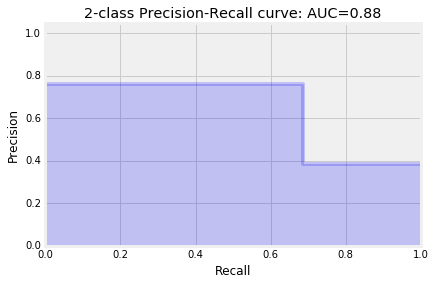

In [38]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y, pred)
# precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

In [36]:
len(y)

150

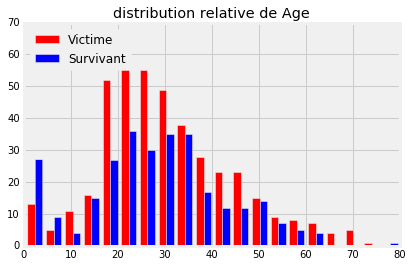

In [123]:
plot_hist('Age')

In [129]:
X['is_child'] = X["Age"] < 8
cols = [c for c in X.columns if 'Age' not in c]
X1 = X[cols] 
compute_score(lr, X1, y)

Accuracy: 0.81 (+/- 0.04)


array([ 0.82122905,  0.81005587,  0.79213483,  0.78089888,  0.83050847])

In [128]:
lr.fit(X, y)
coef = pd.DataFrame([list(X.columns), list(lr.coef_[0])])
coef

0         1         2         3         4         5         6  \
0        Age     SibSp     Parch      Fare  Pclass_1  Pclass_2  Pclass_3   
1 -0.0223084 -0.421813 -0.198159  0.004332   1.06824  0.184109 -0.825251   

            7         8         9  
0  Sex_female  Sex_male  is_child  
1     1.59541  -1.16831    1.7215

#### Random forest au secours du titanic

Index([u'Age', u'SibSp', u'Parch', u'Fare', u'Pclass_1', u'Pclass_2',
       u'Pclass_3', u'Sex_female', u'Sex_male', u'is_child'],
      dtype='object')

In [77]:
from sklearn.ensemble import RandomForestClassifier
#X2 = X.drop('is_child', 1)
rf = RandomForestClassifier()
compute_score(rf, X, y)


Accuracy: 0.82 (+/- 0.06)


array([ 0.77094972,  0.84357542,  0.85955056,  0.80337079,  0.84180791])

In [136]:
compute_score(rf, X1, y)

Accuracy: 0.81 (+/- 0.05)


array([ 0.81005587,  0.78212291,  0.85955056,  0.79213483,  0.81920904])

In [137]:
X1.head()

SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0      1      0   7.2500       0.0       0.0       1.0         0.0       1.0   
1      1      0  71.2833       1.0       0.0       0.0         1.0       0.0   
2      0      0   7.9250       0.0       0.0       1.0         1.0       0.0   
3      1      0  53.1000       1.0       0.0       0.0         1.0       0.0   
4      0      0   8.0500       0.0       0.0       1.0         0.0       1.0   

  is_child  
0    False  
1    False  
2    False  
3    False  
4    False

In [79]:
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([0, 3, 7, 8, 6, 1, 2, 4, 5])

In [82]:
X.columns[indices[0]]

'Age'

##### Importance des variables

[ 0.21783508  0.06094958  0.05955805  0.24956906  0.05066004  0.02845831
  0.          0.          0.29032335  0.04264652]
[8 3 0 1 2 4 9 5 7 6]


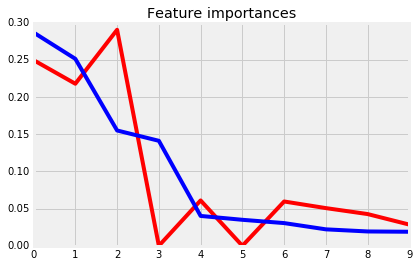

[ 0.24702444  0.02495564  0.02759448  0.28108393  0.02392267  0.04954645
  0.01589976  0.          0.32480426  0.00516837]
[8 3 0 5 2 1 4 6 9 7]


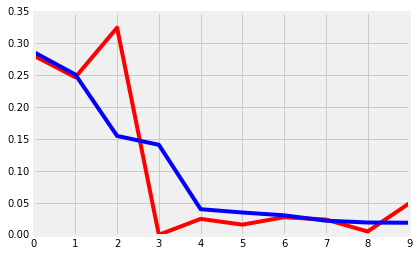

[ 0.23061151  0.05223864  0.03549843  0.30829439  0.02738311  0.01718364
  0.01430335  0.30178404  0.          0.01270289]
[3 7 0 1 2 4 5 6 9 8]


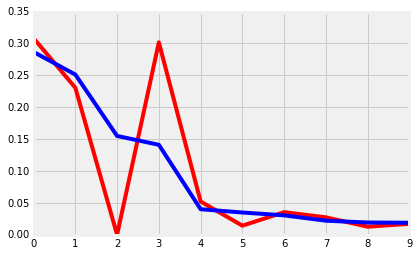

[ 0.23704557  0.03472314  0.04023225  0.30316605  0.02774177  0.01599222
  0.02009817  0.31697467  0.          0.00402616]
[7 3 0 2 1 4 6 5 9 8]


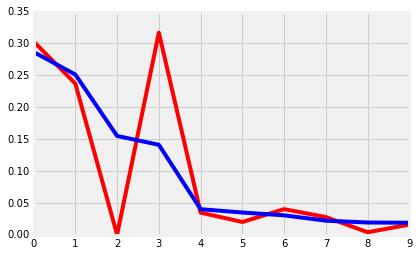

[ 0.22589574  0.09389463  0.01829916  0.34652889  0.00626866  0.03497023
  0.05005899  0.07167178  0.14841689  0.00399503]
[3 0 8 1 7 6 5 2 4 9]


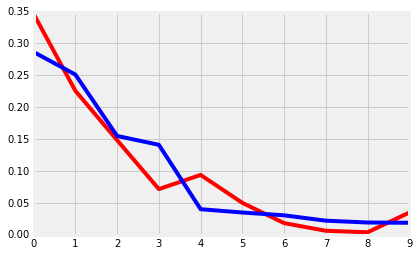

[ 0.27756118  0.04966951  0.03644097  0.23397401  0.02063675  0.02199842
  0.00705884  0.33730438  0.          0.01535594]
[7 0 3 1 2 5 4 9 6 8]


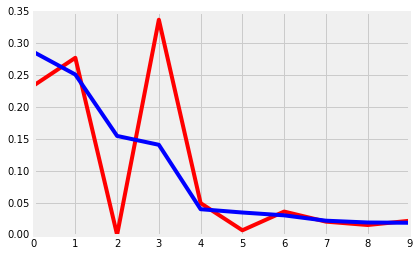

[ 0.27878422  0.01131314  0.02890072  0.2663811   0.00739418  0.0005926
  0.09611688  0.1186313   0.15519599  0.03668987]
[0 3 8 7 6 9 2 1 4 5]


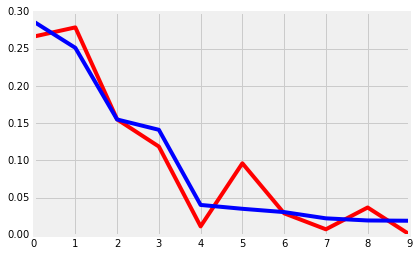

[ 0.32194197  0.01938889  0.01072981  0.27993365  0.01462832  0.01461336
  0.07388025  0.26488375  0.          0.        ]
[0 3 7 6 1 4 5 2 9 8]


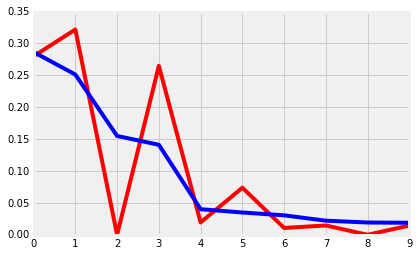

[ 0.25979415  0.02692595  0.03020526  0.31476875  0.02113993  0.00539354
  0.01749943  0.          0.28078797  0.04348502]
[3 8 0 9 2 1 4 6 5 7]


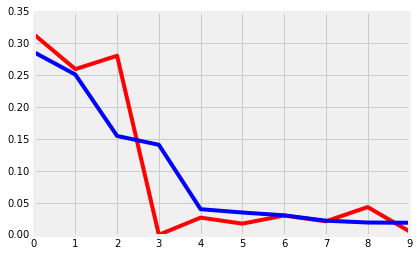

[ 0.21648336  0.02738445  0.01780973  0.28315441  0.02139664  0.
  0.05450782  0.          0.35058374  0.02867983]
[8 3 0 6 9 1 4 2 7 5]


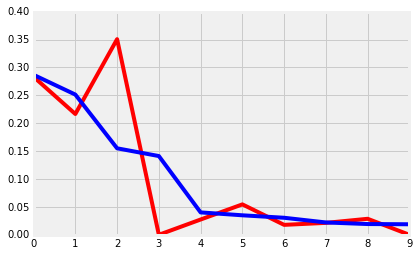

1. feature: Fare (0.286685)
2. feature: Age (0.251298)
3. feature: Sex_male (0.155011)
4. feature: Sex_female (0.141125)
5. feature: SibSp (0.040144)
6. feature: Pclass_3 (0.034942)
7. feature: Parch (0.030527)
8. feature: Pclass_1 (0.022117)
9. feature: is_child (0.019275)
10. feature: Pclass_2 (0.018875)


In [165]:
rf.fit(X, y)
clf_importances(X, rf)

In [5]:
X, target = parse_model_final(train.copy())

In [1]:
xx = "Futrelle, Mrs. Jacques Heath (Lily May Peel)"
xx.split(',')[1].split('.')[0]

' Mrs'

In [6]:
X.head()

Age  SibSp  Parch     Fare  surname  Pclass_1  Pclass_2  Pclass_3  \
0  22.0      1      0   7.2500    False         0         0         1   
1  38.0      1      0  71.2833     True         1         0         0   
2  26.0      0      0   7.9250    False         0         0         1   
3  35.0      1      0  53.1000     True         1         0         0   
4  35.0      0      0   8.0500    False         0         0         1   

   Sex_female  Sex_male    ...     Cabin_-1  Cabin_A  Cabin_B  Cabin_C  \
0           0         1    ...            1        0        0        0   
1           1         0    ...            0        0        0        1   
2           1         0    ...            1        0        0        0   
3           1         0    ...            0        0        0        1   
4           0         1    ...            1        0        0        0   

   Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  is_child  
0        0        0        0        0        0     False  
1        0        0        0        0        0     False  
2        0        0        0        0        0     False  
3        0        0        0        0        0     False  
4        0        0        0        0        0     False  

[5 rows x 40 columns]

In [175]:
X.columns

Index([u'Age', u'SibSp', u'Parch', u'Fare', u'surname', u'Pclass_1',
       u'Pclass_2', u'Pclass_3', u'Sex_female', u'Sex_male', u'title_ Capt',
       u'title_ Col', u'title_ Don', u'title_ Dr', u'title_ Jonkheer',
       u'title_ Lady', u'title_ Major', u'title_ Master', u'title_ Miss',
       u'title_ Mlle', u'title_ Mme', u'title_ Mr', u'title_ Mrs',
       u'title_ Ms', u'title_ Rev', u'title_ Sir', u'title_ the Countess',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Cabin_-1', u'Cabin_A',
       u'Cabin_B', u'Cabin_C', u'Cabin_D', u'Cabin_E', u'Cabin_F', u'Cabin_G',
       u'Cabin_T', u'is_child'],
      dtype='object')

In [184]:
compute_score(rf, X, y)

Accuracy: 0.82 (+/- 0.07)


array([ 0.83240223,  0.78212291,  0.86516854,  0.78089888,  0.85310734])

In [185]:
lr.fit(X, y)
coef = pd.DataFrame([list(X.columns), list(lr.coef_[0])])
coef

0         1         2           3         4         5         6   \
0       Age     SibSp     Parch        Fare   surname  Pclass_1  Pclass_2   
1 -0.023758 -0.524216 -0.378234  0.00518329  0.987482  0.721875  0.425248   

         7           8         9     ...           30         31        32  \
0  Pclass_3  Sex_female  Sex_male    ...     Cabin_-1    Cabin_A   Cabin_B   
1 -0.512256     1.12791  -0.49304    ...    -0.518121  0.0539852  0.243216   

         33        34        35       36        37        38        39  
0   Cabin_C   Cabin_D   Cabin_E  Cabin_F   Cabin_G   Cabin_T  is_child  
1 -0.110258  0.763708  0.959982  0.11054 -0.638104 -0.230081  0.744271  

[2 rows x 40 columns]

In [7]:
from bdc_ml_optimizer.tuning import hp
from bdc_ml_optimizer import tuning
model = {
        "xgboost_hyperparameters":
            {
            "max_depth": [1, 30, 1],
            "learning_rate": [0.01, 0.25, 0.01],
            "n_estimators": [100, 300, 10],
            "nthread": -1,
            "gamma": [0, 2, 0.1]
            },
        "rf_hyperparameters":
            {
            "max_depth": [1, 30, 1],
            "n_estimators": [100, 400, 5],
            'min_samples_leaf': [2, 20, 5]
            }
        }
def space_parameters(model_conf):
    space ={}
    model_hyperparameters = model_conf["rf_hyperparameters"]
    for k in model_hyperparameters.keys():
        param_value = model_hyperparameters[k]
        if (k == "n_estimators") | (k == "min_samples_leaf"):
            space[k] = hp.choice(k, range(param_value[0], param_value[1], param_value[2]))
        elif k == "nthread":
            space[k] = param_value
        else:
            space[k] = hp.quniform(k, param_value[0], param_value[1], param_value[2])
    return space

space = space_parameters(model)

In [8]:
from sklearn.ensemble import RandomForestClassifier

X, target = parse_model_final(train.copy())
estimator_class = RandomForestClassifier

In [9]:
def logloss(p, y, bound_limit=10e-8):
    p = max(min(p, 1 - bound_limit), bound_limit)
 
    return -np.log(p) if y == 1. else -np.log(1. - p) 

logloss(0.91, 1)

0.09431067947124129

In [10]:
from sklearn.metrics import log_loss, accuracy_score

bp = tuning.tune(estimator_class, X.values, target,
         space, log_loss, cv=5, learning='classification')

In [11]:
bp

{'max_depth': 7.0, 'min_samples_leaf': 2, 'n_estimators': 125}

In [15]:
estimator = estimator_class(**bp)
compute_score(estimator, X, target)

Accuracy: 0.83 (+/- 0.03)


array([ 0.82681564,  0.82122905,  0.83707865,  0.80898876,  0.85875706])

In [9]:
x = "Futrelle, Mrs. Jacques Heath (Lily May Peel)"
x.split(',')[1].split('.')[0]

' Mrs'

In [10]:
'(' in x


True